In [12]:
pip install --upgrade tensorflow keras Pillow
pip install numpy
pip install tensorflow
python -m pip install -U matplotlib
pip install os

SyntaxError: invalid syntax (2883657606.py, line 1)

In [13]:
%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [15]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image, UnidentifiedImageError
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%cd "../DFungi_dataset"

c:\Users\Usuario\Documents\Universidad\Semestre 10\Computación\M2 IA\DFungi_AITraining\DFungi_dataset


In [16]:
# Añadir los paths de las carpetas de 'train' y 'test'
train_dir = os.path.join('train')
test_dir = os.path.join('test')

# Empezamos con generación de datos en una variable llamada 'train_datagen'.
# Entrenamos el modelo al mismo tiempo que la generación de datos para no
# perder el tiempo y hacer uso óptimo de la RAM.

# Usamos la función ImageDataGenerator de TensorFlow
train_datagen = ImageDataGenerator(
							rescale = 1./255, # Reescalamos las imágenes
							rotation_range = 10, # Las rotamos levemente (10 grados)
							width_shift_range = 0.2, # Permitimos que se ensanche la imagen
							zoom_range = 0.3, # Hacemos zoom
							horizontal_flip = True) #Volteamos la imagen

# Y BAM! Nuevos datos!

Found 7385 images belonging to 5 classes.


<Figure size 640x480 with 0 Axes>

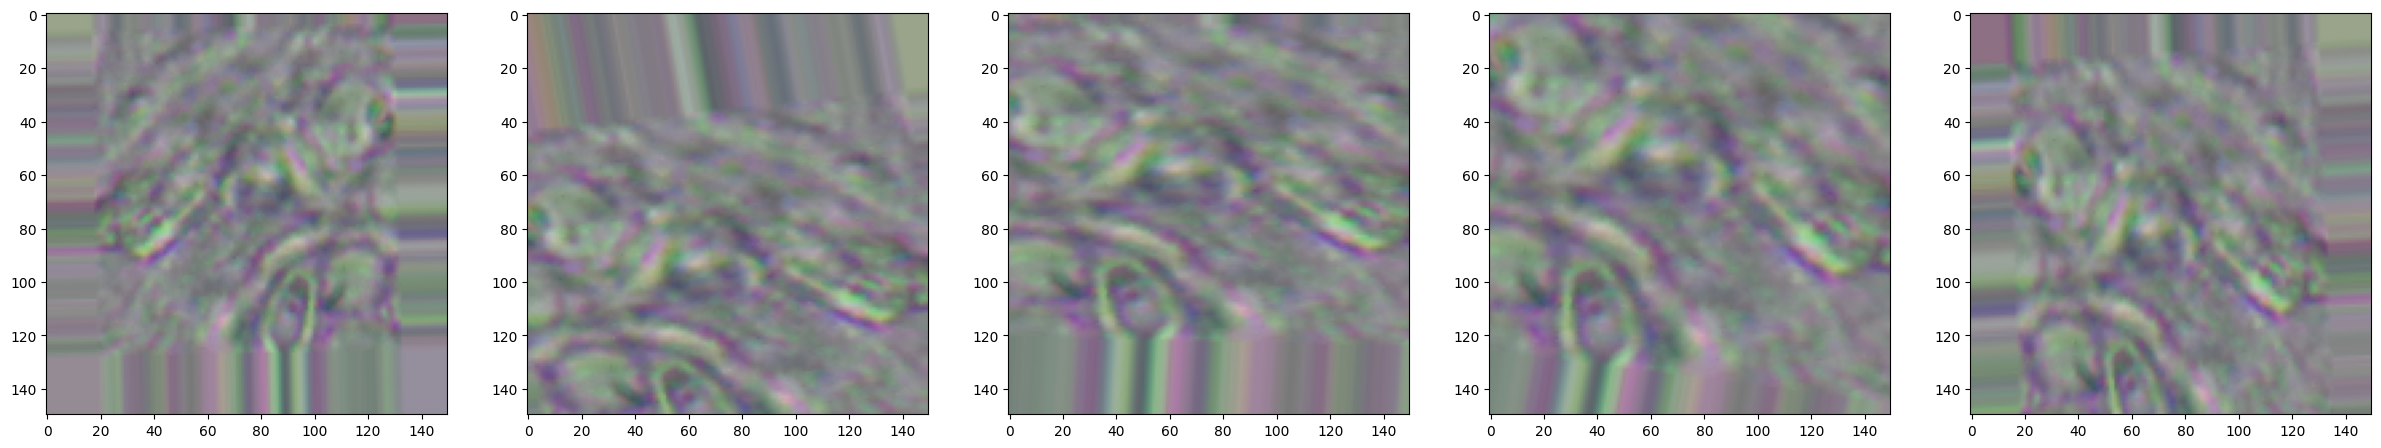

In [18]:
# Alimentamos los datos nuevos de 'train_datagen' a la función 'flow_from_directory'
# de TensorFlow
train_generator = train_datagen.flow_from_directory(
							train_dir, # le damos el path de entrenamiento
							target_size = (150, 150),
							# batch_size = 1 porque la RAM es un relajo XD
							batch_size = 1, # la cantidad de imágenes por conversión
							class_mode ='categorical', # modo categórico porque tenemos
							# 5 clases datos
							)

# Mostramos las nuevas fotos
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 7385 images belonging to 5 classes.
(8, 150, 150, 3)
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


<Figure size 640x480 with 0 Axes>

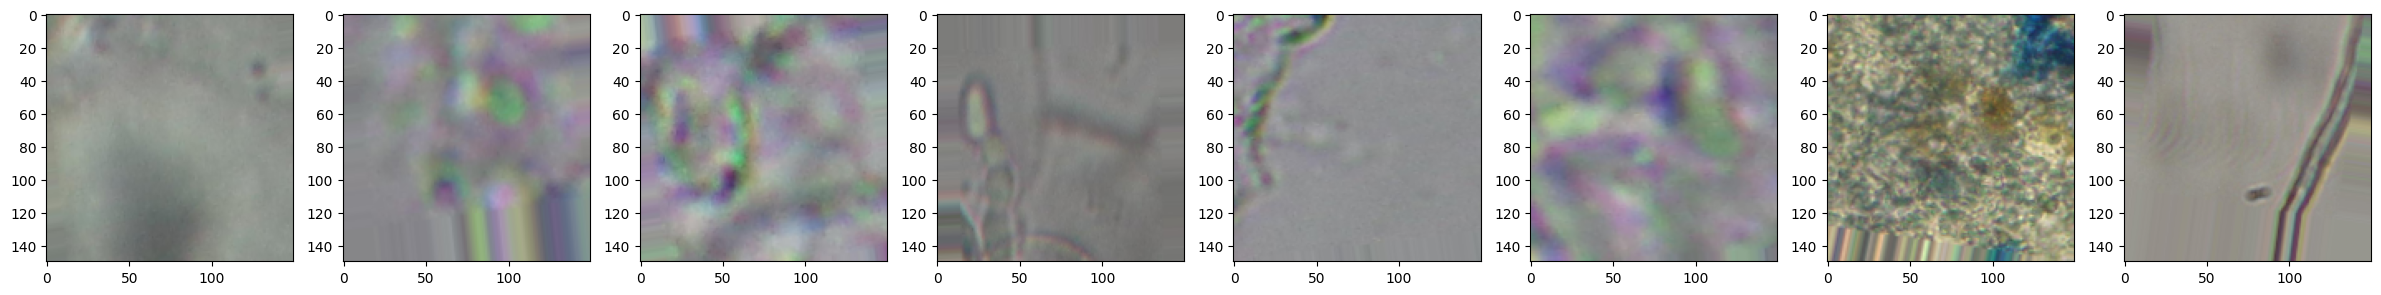

In [19]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [20]:
path = "../DFungi_dataset"

train_generator = train_datagen.flow_from_directory(
							"../DFungi_dataset/train",
							target_size = (150, 150),
							batch_size = 64,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 7385 images belonging to 5 classes.


In [21]:
# Inicio de la red neuronal convolutiva

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['accuracy'])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,191,621 (4.55 MB)

 Trainable params: 1,191,621 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# ESTA REVISIÓN DE ARCHIVOS FUE HECHA POR GEMINI AI PARA REVISAR LOS ARCHIVOS
# UNO POR UNO DEBIDO A QUE SALÍA UN ERROR DONDE NO SE PODÍA ENTRENAR EL MODELO
# POR QUE LOS ARCHIVOS ESTABAN O CORRUPTOS, O INCORRECTOS. TRAS CONSULTAR CON LA
# IA CÓMO REVISAR MIS DOCUMENTOS, HIZO PROPUESTA DE UN DEBUGGING REVISANDO SI
# ALGUNO DE LOS ARCHIVOS ESTABA CAUSANDO EL PROBLEMA. ENCONTRÓ UNA IMAGEN
# CORRUPTA DE ENTRE 9000. TRAS ELIMINARLA, EL MODELO ENTRENÓ SIN PROBLEMA. SIN
# EMBARGO, EXPLICO EL CÓDIGO DEL SIGUIENTE BLOQUE CON MIS PALABRAS.

image_paths_to_check = []

for root, _, files in os.walk("../DFungi_dataset"):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_paths_to_check.append(os.path.join(root, file))

print(f"Checking {len(image_paths_to_check)} potential image files...")

problematic_files = []
for img_path in image_paths_to_check:
    try:
        with open(img_path, 'rb') as f:
            img_bytes = f.read()
        # Try opening the image using PIL
        Image.open(io.BytesIO(img_bytes))
    except UnidentifiedImageError:
        problematic_files.append(img_path)
        print(f"ERROR: Could not identify image file: {img_path}")
    except Exception as e:
        print(f"OTHER ERROR for {img_path}: {e}")

if problematic_files:
    print("\n--- Summary of Problematic Files ---")
    for p_file in problematic_files:
        print(p_file)
else:
    print("\nNo problematic image files found during manual check.")


Checking 9534 potential image files...
ERROR: Could not identify image file: ../DFungi_dataset\train\H6\H6_38a_8.jpg

--- Summary of Problematic Files ---
../DFungi_dataset\train\H6\H6_38a_8.jpg


In [ ]:
history = model.fit(
						train_generator,
						epochs = 10,
						)


acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.4772 - loss: 1.2925
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.5805 - loss: 1.0508
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.5730 - loss: 1.0723
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6048 - loss: 0.9848
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6009 - loss: 1.0093
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6078 - loss: 0.9617
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6037 - loss: 0.9627
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6201 - loss: 0.9423
Epoch 9/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6371 - loss: 0.9019
Epoch 10/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6429 - loss: 0.8868
Epoch 11/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6406 - loss: 0.8801
Epoch 12/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 